In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import os


C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import scipy.stats


In [17]:
from scipy import signal

In [3]:
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

In [5]:
os.chdir('C:/Users/tamee/Downloads/')
ds1 = xr.open_dataset('zg_Amon_EC-Earth3_historical_r1i1p1f1_gr_190601-190612.nc')
hgt = ds1.zg.sel(lat=slice(-10,90), lon=slice(180.5, 360),plev=slice(6) ,time=slice('1960-01-01','1960-12-31'))
lat_zg = ds1.lat.sel(lat=slice(-10,90))
lon_zg = ds1.lon.sel(lon=slice(180.5, 360))

In [6]:
hgt2d = hgt.values
ntime,nlevel, nrow_zg, ncol_zg = hgt2d.shape
print(nrow_zg,ncol_zg)

142 255


In [7]:
os.chdir('C:/Users/tamee/Downloads/')
a= pd.read_csv("z_anom_ec.csv")

os.chdir('C:/Users/tamee/Downloads/new_runs/ec_earth/historical/')
ec= pd.read_csv('TP_s6_8.csv')
b1=(ec - ec.mean())/ec.std()
b1= np.mean(b1,axis=1)
b1

0     0.757182
1     0.189056
2     0.762358
3    -1.521898
4     0.004436
5     0.893850
6     0.411144
7    -0.682611
8     0.572780
9    -0.403773
10    0.970390
11   -1.201419
12    0.830627
13    0.132169
14   -1.077142
15    0.768128
16    0.614917
17   -1.119104
18   -0.147189
19    0.566829
20    0.504984
21   -0.502129
22   -0.781773
23   -0.125449
24    1.335989
25   -0.527301
26   -1.113379
27   -0.669170
28    0.038402
29    0.266196
30   -0.361749
31   -1.098941
32    1.386246
33   -0.379084
34   -0.141546
35    0.847974
dtype: float64

In [8]:
a= a.drop(['Unnamed: 0'],axis=1)
#b= b.drop(['Unnamed: 0'],axis=1)

a_t= a.T

In [18]:
a_zg = PCA(n_components=8)
a_zg.fit(a_t)
a_reduced= a_zg.transform(a_t)
a_reduced= signal.detrend(a_reduced, axis=0, type='linear')
zg_f=a_zg.inverse_transform(a_reduced)
print(a_zg.explained_variance_ratio_.sum())

0.8026407610695994


In [44]:
eofs = a_zg.components_
eofs_updated = signal.detrend(eofs, axis=0, type='linear')
year= np.arange(1, 37)   # [1 2 3 ... 36]

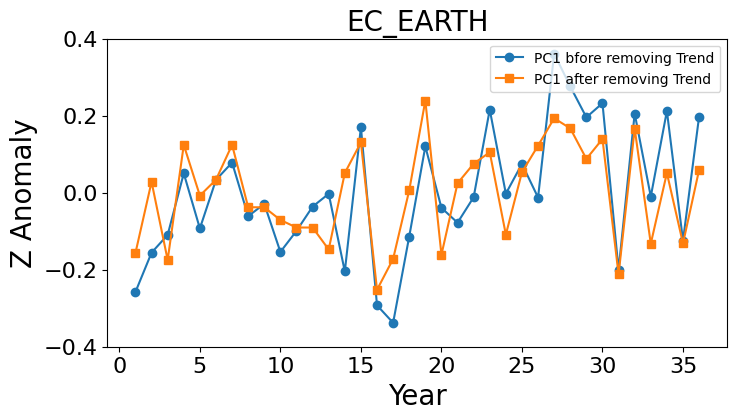

In [49]:
plt.figure(figsize=(8,4))
plt.plot(year, eofs[0], marker='o', label='PC1 bfore removing Trend')
plt.plot(year, eofs_updated[0], marker='s', label='PC1 after removing Trend')
plt.ylim(-0.4,0.4)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Z Anomaly",fontsize= 20)
plt.title("EC_EARTH",fontsize=20)
plt.legend()
plt.legend(loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=16) 
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('ts_ec.png',dpi=300, bbox_inches="tight")

In [10]:
rp= np.reshape(zg_f,(nrow_zg,ncol_zg,36),order='F')
range(rp.shape[0])

range(0, 142)

In [11]:
cor_ec= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_ec[:] = np.nan
cor_ec_p= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_ec_p[:] = np.nan

In [14]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_ec[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[0]
        
        

In [15]:
cor_ec

array([[-0.024710424710424714, -0.024710424710424714,
        -0.024710424710424714, ..., -0.07490347490347489,
        -0.0761904761904762, -0.0761904761904762],
       [-0.022136422136422137, -0.022136422136422137,
        -0.022136422136422137, ..., -0.07850707850707851,
        -0.07850707850707851, -0.07567567567567568],
       [-0.027541827541827543, -0.027541827541827543,
        -0.027541827541827543, ..., -0.06975546975546977,
        -0.06975546975546977, -0.06537966537966539],
       ...,
       [0.2380952380952381, 0.2380952380952381, 0.2380952380952381, ...,
        0.26924066924066925, 0.26924066924066925, 0.26924066924066925],
       [0.23783783783783782, 0.23783783783783782, 0.23783783783783782,
        ..., 0.2782496782496783, 0.2782496782496783, 0.2782496782496783],
       [0.23732303732303733, 0.23732303732303733, 0.23732303732303733,
        ..., 0.2710424710424711, 0.2710424710424711, 0.2710424710424711]],
      dtype=object)

In [19]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_ec_p[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[1]
        

In [20]:
ec_sign= np.zeros([142,255])

In [21]:
for i in range(ec_sign.shape[0]):
    for j in range(ec_sign.shape[1]):
        if cor_ec_p[i,j]<0.1:
            ec_sign[i,j]= ec_sign[i,j]+1
        else:
            ec_sign[i,j]= ec_sign[i,j]+0

In [22]:
y,x=np.where(ec_sign>0)


In [23]:
x_list1= x.tolist()
y_list1=y.tolist()
lat_np= lat_zg.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon_zg.to_numpy()
lon_ls= lon_np.tolist()

In [24]:
lat_list1= []
for values in list(range(len(y_list1))):
    lat_list1.append(lat_ls[y_list1[values]])
    

In [25]:
lon_list1= []
for values in list(range(len(x_list1))):
    lon_list1.append(lon_ls[x_list1[values]])

In [26]:
lat_list1

[46.6665512870549,
 46.6665512870549,
 46.6665512870549,
 46.6665512870549,
 46.6665512870549,
 46.6665512870549,
 46.6665512870549,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 47.3683028045918,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.0700542447729,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.7718056035057,
 48.77180560

In [27]:
cor_ec.max()

0.3832689832689833

In [29]:
def to_float(arr):
    # fast path if already numeric
    if isinstance(arr, np.ndarray) and np.issubdtype(arr.dtype, np.number):
        return arr.astype(np.float64, copy=False)
    # attempt robust conversion (handles lists / mixed types)
    return np.array(arr, dtype=np.float64)

In [30]:
cor_ec=to_float(cor_ec)

C:\Users\tamee\AppData\Local\Temp\ipykernel_23628\1946036819.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  m.plot(lon_list1,lat_list1,'bo',markersize=0.1,color='k')


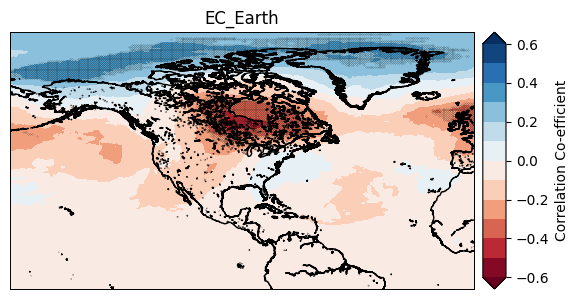

In [35]:
m = Basemap(projection='cyl', llcrnrlon=min(lon_zg), llcrnrlat=min(lat_zg),
        urcrnrlon=max(lon_zg), urcrnrlat=max(lat_zg),resolution='h')

x, y = m(*np.meshgrid(lon_zg,lat_zg))

cs = m.contourf(x,y,cor_ec,np.arange(-0.6,0.7,0.1), cmap='RdBu',extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=0.1,color='k')
m.drawcoastlines()
#m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('Correlation Co-efficient')
plt.title('EC_Earth')
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('PCA_EC_trend_removed.png')

In [36]:
os.chdir("C:/Users/tamee/Downloads/review figures/")
np.savetxt("cor_ec.txt", cor_ec, fmt="%.2f", delimiter="\t")

In [37]:
os.chdir("C:/Users/tamee/Downloads/")
ds1 = xr.open_dataset('hgt.mon.mean.nc')
hgt = ds1.hgt.sel(lat=slice(90,-7.5), lon=slice(182.5, 360),level=slice(6) ,time=slice('1979-01-01','2014-12-31'))
lat_cpc = ds1.lat.sel(lat=slice(90, -7.5))
lon_cpc = ds1.lon.sel(lon=slice(182.5, 360))

In [38]:
os.chdir("C:/Users/tamee/Downloads/review figures/")


cpc = np.loadtxt("cor_cpc.txt")  


In [40]:
from scipy.interpolate import RegularGridInterpolator

In [41]:
fA = RegularGridInterpolator((lat_zg, lon_zg), cor_ec, bounds_error=False, fill_value=np.nan)
LATB, LONB = np.meshgrid(lat_cpc, lon_cpc, indexing='ij')  # (nlatB, nlonB)
pts = np.column_stack((LATB.ravel(), LONB.ravel()))
A_on_B = fA(pts).reshape(LATB.shape)

In [42]:
mask = np.isfinite(A_on_B) & np.isfinite(cpc)
r = np.corrcoef(A_on_B[mask].ravel(), cpc[mask].ravel())[0, 1]

In [43]:
r

0.20481016677796002